In [377]:
import numpy as np
import pandas as pd

In [378]:
df = pd.read_excel("spam.xlsx")

In [379]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [380]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [382]:
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [383]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [384]:
df.rename(columns={"v1":"Target","v2":"Text"}, inplace=True)

In [385]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [386]:
df["Target"].unique()

array(['ham', 'spam'], dtype=object)

In [387]:
from sklearn.preprocessing import LabelEncoder

In [388]:

encoder = LabelEncoder()

In [389]:
df["Target"] = encoder.fit_transform(df["Target"])

In [390]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [391]:
df.duplicated().sum()

403

In [392]:
df[df["Text"].duplicated() == True]

,Target,Text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [393]:
df = df.drop_duplicates(keep="first")

In [394]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 2. EDA

In [395]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [396]:
import matplotlib.pyplot as plt

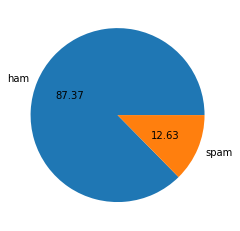

In [397]:
plt.pie(df["Target"].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.show()

#### Data is imbalanced

In [398]:
import nltk
# nltk.download("punkt")

In [399]:
df["Text"] = df["Text"].astype(str)  # Convert the "Text" column to string data type
df["TextLength"] = df["Text"].apply(len)  # Apply the len() function to calculate the length


In [400]:
df

,Target,Text,TextLength
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [401]:
df["Text"].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [402]:
#Calculate the number of words in a sentence
df["num_words"] = df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [403]:
df.head()

,Target,Text,TextLength,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [404]:
df["Text"].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [405]:
df["num_sentences"] = df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [406]:
df.head()

,Target,Text,TextLength,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [407]:
df[["TextLength","num_words","num_sentences"]].describe()

,TextLength,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455407,1.961308
std,58.239404,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [408]:
df[df["TextLength"] == 2]

,Target,Text,TextLength,num_words,num_sentences
1924,0,Ok,2,1,1


In [409]:
#Ham
df[df["Target"]==0][["TextLength","num_words","num_sentences"]].describe()

,TextLength,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123339,1.815545
std,56.362288,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [410]:
#Spam
df[df["Target"]==1][["TextLength","num_words","num_sentences"]].describe()

,TextLength,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [411]:
import seaborn as sns

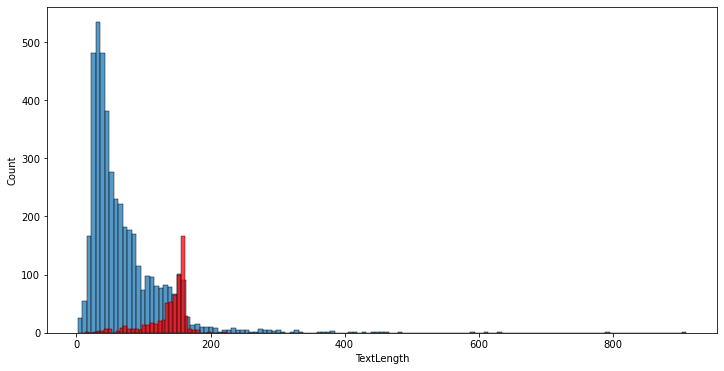

In [412]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"] == 0]["TextLength"])
sns.histplot(df[df["Target"] == 1]["TextLength"], color="red")
plt.show()

In [413]:
x = df["TextLength"].value_counts()

In [414]:
sorted_dict = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
sorted_dict

{22: 91,
 24: 91,
 32: 90,
 23: 86,
 38: 82,
 26: 81,
 29: 79,
 25: 79,
 30: 78,
 37: 77,
 31: 77,
 34: 76,
 28: 74,
 36: 72,
 27: 71,
 33: 71,
 40: 69,
 35: 67,
 42: 64,
 45: 64,
 41: 62,
 46: 62,
 47: 61,
 39: 60,
 51: 56,
 54: 54,
 48: 52,
 43: 52,
 159: 50,
 158: 50,
 44: 49,
 49: 49,
 160: 48,
 50: 45,
 156: 44,
 73: 44,
 157: 43,
 55: 42,
 155: 42,
 53: 42,
 52: 40,
 66: 40,
 153: 39,
 63: 39,
 70: 38,
 59: 38,
 58: 38,
 65: 38,
 154: 36,
 62: 36,
 67: 35,
 152: 34,
 77: 34,
 84: 32,
 72: 32,
 82: 31,
 61: 31,
 56: 31,
 74: 31,
 85: 30,
 69: 30,
 60: 29,
 80: 29,
 149: 28,
 57: 28,
 148: 28,
 147: 27,
 143: 27,
 71: 27,
 76: 27,
 64: 26,
 87: 25,
 142: 24,
 126: 24,
 75: 24,
 86: 24,
 146: 23,
 89: 23,
 81: 23,
 133: 23,
 121: 23,
 88: 23,
 137: 22,
 161: 22,
 135: 21,
 78: 21,
 162: 21,
 104: 21,
 95: 21,
 96: 21,
 132: 21,
 68: 21,
 107: 21,
 139: 21,
 83: 20,
 134: 20,
 114: 20,
 101: 20,
 21: 19,
 92: 19,
 150: 19,
 79: 19,
 120: 19,
 112: 19,
 115: 19,
 136: 19,
 144: 18,
 1

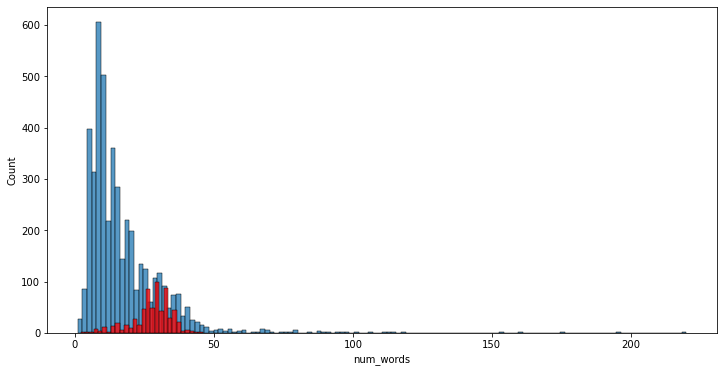

In [415]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"] == 0]["num_words"])
sns.histplot(df[df["Target"] == 1]["num_words"], color="red")
plt.show()

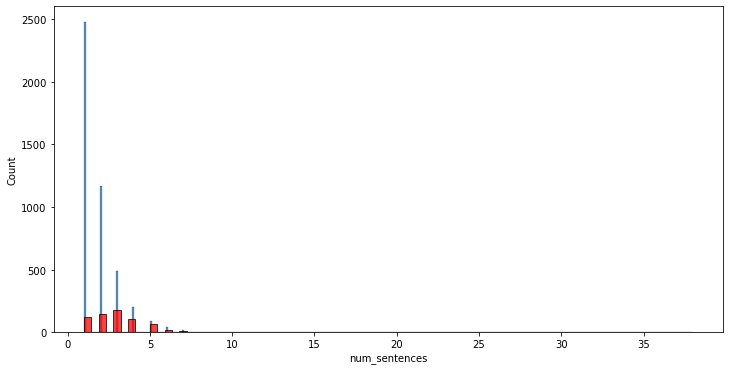

In [416]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"] == 0]["num_sentences"])
sns.histplot(df[df["Target"] == 1]["num_sentences"], color="red")
plt.show()

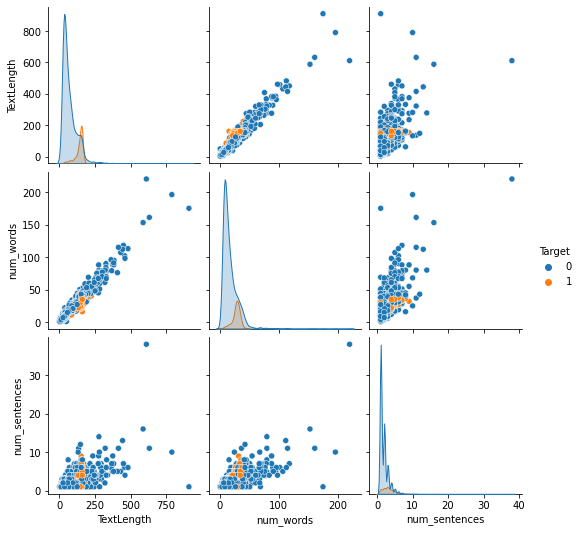

In [417]:
sns.pairplot(df, hue = "Target")
plt.show()

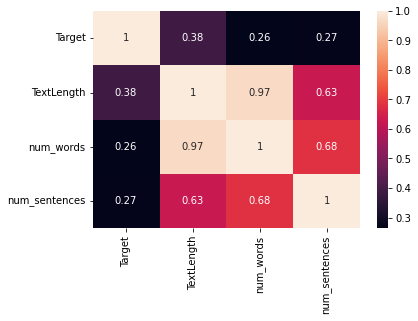

In [418]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [132]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Meer Zamanat
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [419]:
from nltk.corpus import stopwords

In [420]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [421]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [422]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [423]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize (text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [424]:
transform_text("Hi, how are you bro ?")

'hi bro'

In [425]:
df["Text"].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [426]:
df["Transformed_Text"] = df["Text"].apply(transform_text)

In [427]:
df.head()

,Target,Text,TextLength,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [428]:
spam_corpus = []
for msg in df[df["Target"] == 1] ["Transformed_Text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [429]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [430]:
len(spam_corpus)

9939

In [431]:
from collections import Counter

In [432]:
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [433]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


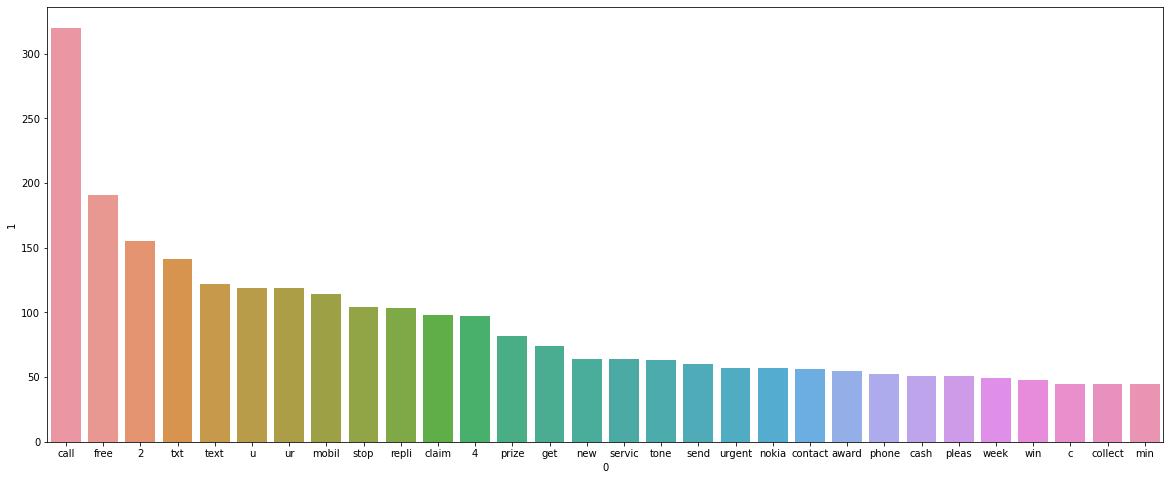

In [434]:
figure = plt.figure(figsize=(20,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.show()

In [435]:
ham_corpus = []
for msg in df[df["Target"] == 0] ["Transformed_Text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [436]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


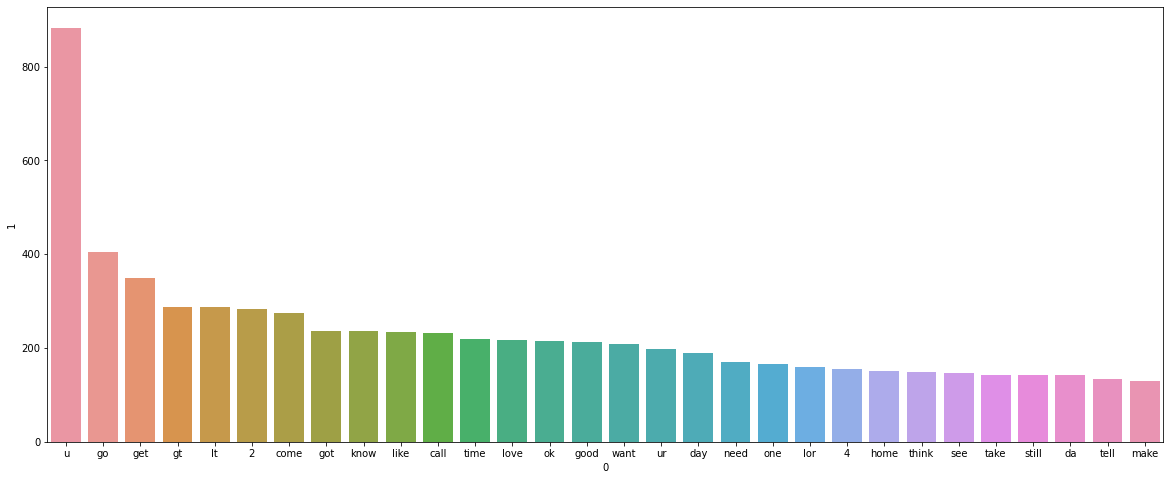

In [437]:
figure = plt.figure(figsize=(20,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.show()

In [438]:
df.head()

,Target,Text,TextLength,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model building

In [439]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [234]:
X = cv.fit_transform(df["Transformed_Text"]).toarray()

In [235]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [236]:
X.shape

(5169, 6708)

In [237]:
y = df["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [443]:
from sklearn.model_selection import train_test_split

In [332]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [336]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [337]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [338]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [339]:
clfs = {
    'MNB' : mnb,
    'GNB' : gnb,
    'BNB' : bnb,
    'SVC' : svc,
    'KN' : knc,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [340]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [341]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [342]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    

For  MNB
Accuracy -  0.971953578336557
Precision -  1.0
For  GNB
Accuracy -  0.8723404255319149
Precision -  0.5137614678899083
For  BNB
Accuracy -  0.9825918762088974
Precision -  0.9918032786885246
For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy -  0.9574468085106383
Precision -  0.97
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9655172413793104
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9369369369369369
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8604651162790697
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9411764705882353


In [256]:
performance_df_tfid = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [345]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [258]:
performance_df_tfid.sort_values('Precision', ascending=False)

,Algorithm,Accuracy,Precision
0,MNB,0.959381,1.000000
4,KN,0.900387,1.000000
7,RF,0.971954,0.990991
10,ETC,0.975822,0.982906
3,SVC,0.972921,0.974138
2,BNB,0.970019,0.973451
8,AdaBoost,0.962282,0.954128
6,LR,0.951644,0.940000
12,xgb,0.970019,0.934959
11,GBDT,0.952611,0.923810


In [346]:
performance_df_tfid = performance_df_tfid.merge(temp_df,on='Algorithm', )

In [352]:
performance_df_tfid.sort_values("Precision_max_ft_3000", ascending=False)

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,MNB,0.959381,1.000000,0.971954,1.000000
4,KN,0.900387,1.000000,0.905222,1.000000
2,BNB,0.970019,0.973451,0.982592,0.991803
10,ETC,0.975822,0.982906,0.980658,0.983607
3,SVC,0.972921,0.974138,0.974855,0.974576
6,LR,0.951644,0.940000,0.957447,0.970000
7,RF,0.971954,0.990991,0.970986,0.965517
12,xgb,0.970019,0.934959,0.968085,0.941176
8,AdaBoost,0.962282,0.954128,0.960348,0.936937
11,GBDT,0.952611,0.923810,0.948743,0.929293


In [248]:
performance_df

,Algorithm,Accuracy,Precision
0,MNB,0.964217,0.834437
1,GNB,0.880077,0.531532
2,BNB,0.970019,0.973451
3,SVC,0.930368,0.766129
4,KN,0.906190,1.000000
5,DT,0.926499,0.942857
6,LR,0.970986,0.973684
7,RF,0.970986,1.000000
8,AdaBoost,0.963250,0.946429
9,BgC,0.959381,0.913793


In [444]:
X = tfidf.fit_transform(df["Transformed_Text"]).toarray()

In [445]:
y = df["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [446]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [447]:
from sklearn.naive_bayes import MultinomialNB
Mnb = MultinomialNB()

In [448]:
Mnb.fit(X_train,y_train)

MultinomialNB()

In [450]:
y_pred = Mnb.predict(X_test)

In [451]:
accuracy_score(y_test,y_pred)

0.971953578336557

In [452]:
precision_score(y_test,y_pred)

1.0

In [453]:
import pickle

In [454]:
pickle.dump(tfidf,open("Vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))